In [2]:
from src.data.csv_dataset import CSVDataset
from src.data.csv_dataset import FeatureSelectorAndNormalizationTransform
from src.data.dataloader import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
target_column = 'SalePrice'
project_path = os.path.dirname(os.path.abspath(os.getcwd()))
root_path = os.path.join(project_path, "datasets", 'housing')
housing_file_path = os.path.join(root_path, "housing_train.csv")
download_url = 'https://cdn3.vision.in.tum.de/~dl4cv/housing_train.zip'

# Always make sure this line was run at least once before trying to
# access the data manually, as the data is downloaded in the 
# constructor of CSVDataset.
train_dataset = CSVDataset(target_column=target_column, root=root_path, download_url=download_url, mode="train")

In [5]:
df = train_dataset.df
target_column = 'SalePrice'
# Select only 2 features to keep plus the target column.
selected_columns = ['GrLivArea','GarageArea', target_column]
mn, mx, mean = df.min(), df.max(), df.mean()

column_stats = {}
for column in selected_columns:
    crt_col_stats = {'min' : mn[column],
                     'max' : mx[column],
                     'mean': mean[column]}
    column_stats[column] = crt_col_stats    

transform = FeatureSelectorAndNormalizationTransform(column_stats, target_column)

def rescale(data, key = "SalePrice", column_stats = column_stats):
    """ Rescales input series y"""
    mx = column_stats[key]["max"]
    mn = column_stats[key]["min"]

    return data * (mx - mn) + mn

In [6]:
train_dataset = CSVDataset(mode="train", target_column=target_column, root=root_path, download_url=download_url, transform=transform)
val_dataset = CSVDataset(mode="val", target_column=target_column, root=root_path, download_url=download_url, transform=transform)
test_dataset = CSVDataset(mode="test", target_column=target_column, root=root_path, download_url=download_url, transform=transform)

print("Number of training samples:", len(train_dataset))
print("Number of validation samples:", len(val_dataset))
print("Number of test samples:", len(test_dataset))

Number of training samples: 876
Number of validation samples: 292
Number of test samples: 292


In [8]:
# Test the affine function
from src.tests.layer_tests import *
print(AffineLayerTest()())


AffineForwardTest passed.
AffineBackwardTestDx passed.
AffineBackwardTestDw passed.
AffineBackwardTestDb passed.
Congratulations you have passed all the unit tests!!! Tests passed: 4/4
(0, 4)


In [9]:
# Test the sigmoid function

print(SigmoidTest()())

SigmoidForwardTest passed.
SigmoidBackwardTest passed.
Congratulations you have passed all the unit tests!!! Tests passed: 2/2
(0, 2)


In [11]:
from src.tests.regression_net_tests import test_regression_net
from src.networks.regression_net import RegressionNet
test_regression_net(RegressionNet)

RegressionNetForwardTest passed.
Method forward() correctly implemented. Tests passed: 1/1
RegressionNetBackwardTest passed.
Class RegressionNet correctly implemented. Tests passed: 2/2
Score: 100/100


100

In [12]:
from src.networks.optimizer import SGD
from src.networks.loss import MSE, L1

In [14]:
from src.networks.regression_net import RegressionNet
from src.solver import Solver

batch_size = 4
lr = 1e-3
hidden_size = 100
std = 1.
epochs = 20

model = RegressionNet(input_size=2, hidden_size=hidden_size, std=std)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


solver = Solver(model, train_dataloader, val_dataloader, learning_rate=lr, loss_func=MSE(), optimizer=SGD)

# add test data to test before training
X_test = [test_dataset[i]['features'] for i in range((len(test_dataset)))]
X_test = np.stack(X_test, axis=0)
y_test = [test_dataset[i]['target'] for i in range((len(test_dataset)))]
y_test = np.stack(y_test, axis=0)



y_out = solver.get_dataset_prediction(test_dataloader)
l1_loss = L1()
mse_loss = MSE()
print("L1 loss on test set BEFORE training: {:,.0f}".format(l1_loss(rescale(y_out), rescale(y_test))[0].mean() ))
print("MSE loss on test set BEFORE training: {:,.0f}".format(mse_loss(rescale(y_out), rescale(y_test))[0].mean() ))




solver.train(epochs=epochs)

y_out, _ = model(X_test)
l1_loss = L1()
mse_loss = MSE()
print("L1 loss on test set AFTER training: {:,.0f}".format(l1_loss(rescale(y_out), rescale(y_test))[0].mean() ))
print("MSE loss on test set AFTER training: {:,.0f}".format(mse_loss(rescale(y_out), rescale(y_test))[0].mean() ))

L1 loss on test set BEFORE training: 1,686,081
MSE loss on test set BEFORE training: 2,866,170,408,126
(Epoch 1 / 20) train loss: 5.561933; val loss: 5.606161
(Epoch 2 / 20) train loss: 0.269933; val loss: 0.067703
(Epoch 3 / 20) train loss: 0.062422; val loss: 0.054788
(Epoch 4 / 20) train loss: 0.051043; val loss: 0.044551
(Epoch 5 / 20) train loss: 0.041997; val loss: 0.036434
(Epoch 6 / 20) train loss: 0.034802; val loss: 0.029996
(Epoch 7 / 20) train loss: 0.029075; val loss: 0.024888
(Epoch 8 / 20) train loss: 0.024513; val loss: 0.020835
(Epoch 9 / 20) train loss: 0.020877; val loss: 0.017616
(Epoch 10 / 20) train loss: 0.017975; val loss: 0.015060
(Epoch 11 / 20) train loss: 0.015656; val loss: 0.013028
(Epoch 12 / 20) train loss: 0.013802; val loss: 0.011412
(Epoch 13 / 20) train loss: 0.012317; val loss: 0.010126
(Epoch 14 / 20) train loss: 0.011125; val loss: 0.009102
(Epoch 15 / 20) train loss: 0.010167; val loss: 0.008285
(Epoch 16 / 20) train loss: 0.009396; val loss: 0.0

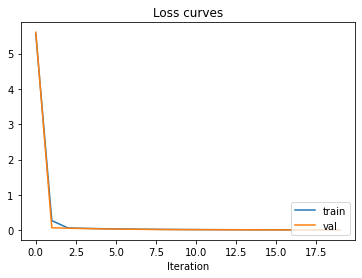

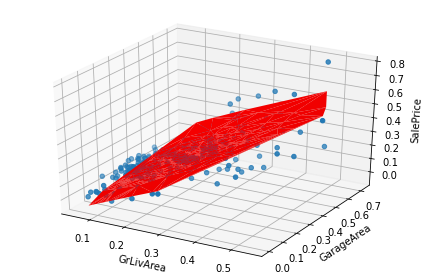

In [16]:
# # visualize training, validation loss and  prediction
y_out = solver.get_dataset_prediction(test_dataloader)


plt.title('Loss curves')
plt.plot(solver.train_loss_history, '-', label='train')
plt.plot(solver.val_loss_history, '-', label='val')
plt.legend(loc='lower right')
plt.xlabel('Iteration')
plt.show()

if np.shape(X_test)[1]==1:
    plt.scatter(X_test, y_test, label = "Ground Truth")
    inds = X_test.argsort(0).flatten()
    plt.plot(X_test[inds], y_out[inds], color='r', label = "Prediction")
    plt.legend()
    plt.show()
else:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    first_feature = X_test[:, 0]
    second_feature = X_test[:, 1]
    salePrice = y_test[:, 0]
    
    salePricePred = y_out[:, 0]
    ax.plot_trisurf(first_feature, second_feature, salePricePred, linewidth=0, antialiased=True,color ="red")

    ax.scatter(first_feature, second_feature, salePrice)
  
    ax.set_xlabel(selected_columns[0])
    ax.set_ylabel(selected_columns[1])
    ax.set_zlabel(selected_columns[2])
    plt.tight_layout()
    plt.show()
    